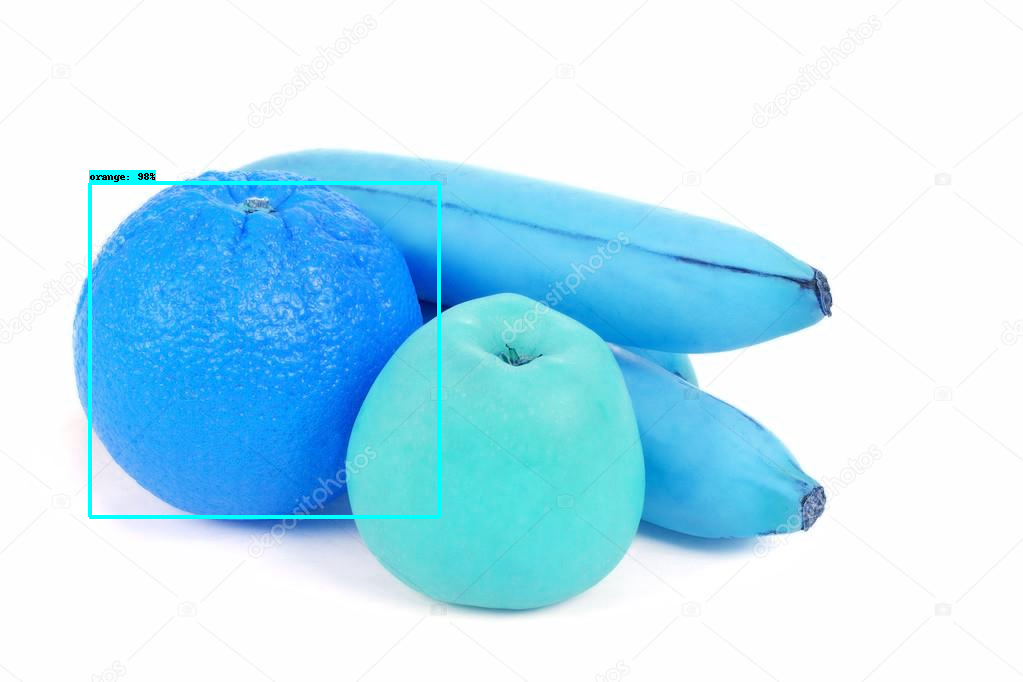

In [6]:
import os
from IPython.display import display
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
import cv2

IMAGE_PATHS = '/home/user/Documents/Tensorflow/workspace/training_demo/images/test/mixed_18.jpg'
PATH_TO_MODEL_DIR = '/home/user/Documents/Tensorflow/workspace/training_demo/exported-models/saved_model'
PATH_TO_LABELS = '/home/user/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt'
MIN_CONF_THRESH = float(0.60)
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis, ...]
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
image_with_detections = image.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)
# cv2_imshow(image_with_detections)
display(Image.fromarray(image_with_detections))